In [66]:
#Import libraries
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#Load the data 
dataset = load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)


## Country location for all jobs

<function matplotlib.pyplot.show(close=None, block=None)>

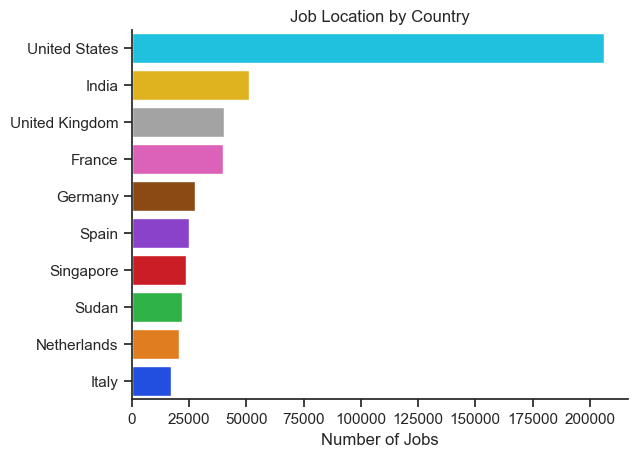

In [72]:
#Lets explore the top countries the data has for ALL jobs

df_country_plot = df['job_country'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_country_plot, x = 'count', y = 'job_country', hue = 'count', palette= 'bright' , legend = False)
sns.despine()
plt.title('Job Location by Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show

In [ ]:

df_DA_US = df[(df['job_country'] == 'United States') & (df['job_title_short'] == 'Data Analyst')] 

## Top 10 job locations in the US 
 
I am from the United States, so I want to hone in on just the US data and see which cities have the most jobs.

<function matplotlib.pyplot.show(close=None, block=None)>

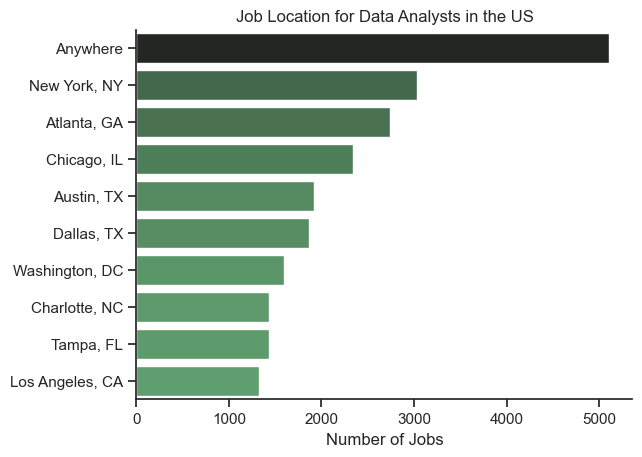

In [67]:
df_plot = df_DA_US['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot, x = 'count', y = 'job_location', hue = 'count', palette= 'dark:g_r' , legend = False)
sns.despine()
plt.title('Job Location for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show

## Pie Charts of Benefits and Requirements for Data Analysts in the US

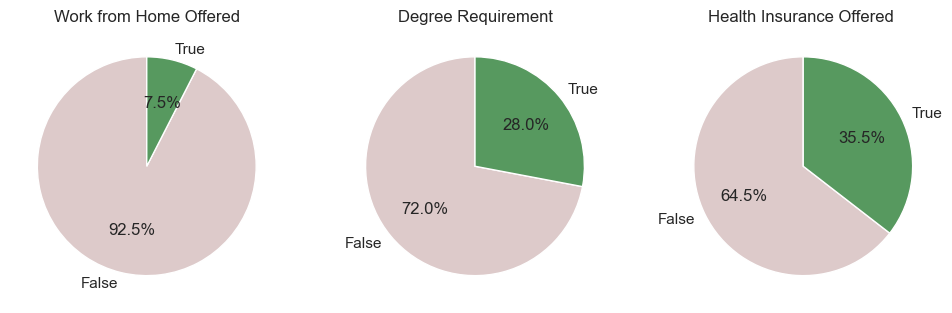

In [64]:
dict_column = {
'job_work_from_home': 'Work from Home Offered',
'job_no_degree_mention': 'Degree Requirement',
'job_health_insurance': 'Health Insurance Offered '
}
colors = ["#ddcaca", "#57995f"]
fig, ax = plt.subplots(1,3)
fig.set_size_inches((12,5))


for i, (column, title) in enumerate(dict_column.items()): 
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle = 90, colors = colors)
    ax[i].set_title(title) 

plt.show()

## Top 10 companies for Data Analysts in the US

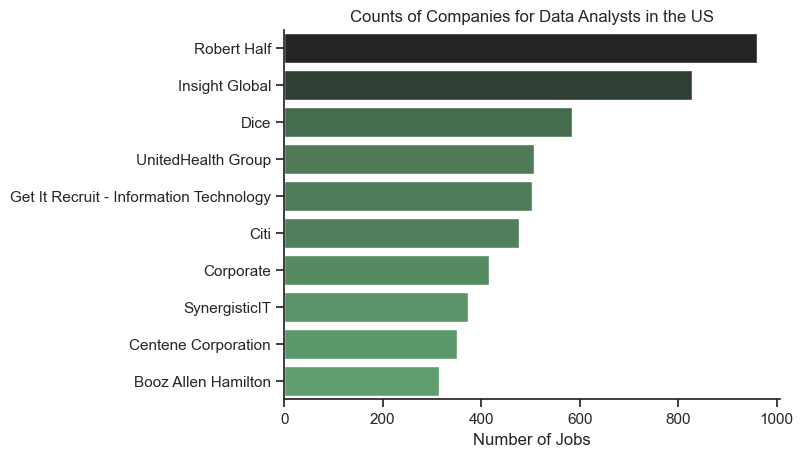

In [68]:
df_plot_company_name = df_DA_US['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style = 'ticks')
sns.barplot(data = df_plot_company_name, x = 'count', y = 'company_name', hue = 'count', palette= 'dark:g_r' , legend = False)
sns.despine()
plt.title('Counts of Companies for Data Analysts in the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()